In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train length: ", len(X_train))
print("X_test length", len(X_test))

X_train length:  60000
X_test length 10000


In [32]:
print("Shape of X_train: ", X_train[0].shape)

Shape of X_train:  (28, 28)


In [33]:
print("The information of X_train data: ")
print(X_train[0])

The information of X_train data: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

The picture of X_train: 


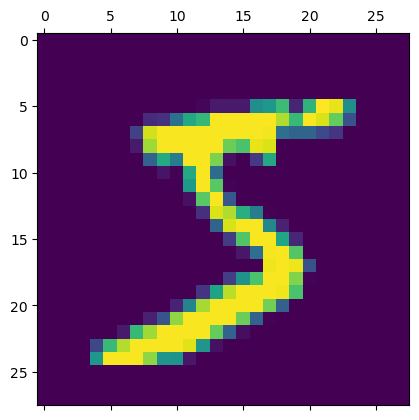

In [34]:
print("The picture of X_train: ")
plt.matshow(X_train[0])

In [35]:
print("Y_train[0]: ",y_train[0])

Y_train[0]:  5


In [36]:
# Divide X_train data with 255 (converts into float number between 0 to 1)

X_train = X_train/255
X_test = X_test/255

In [37]:
# Flatten training data

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)

(60000, 784)


In [38]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4701 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.2831 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9247


In [39]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 959us/step - loss: 0.2671 - accuracy: 0.9266


[0.2670546770095825, 0.9265999794006348]

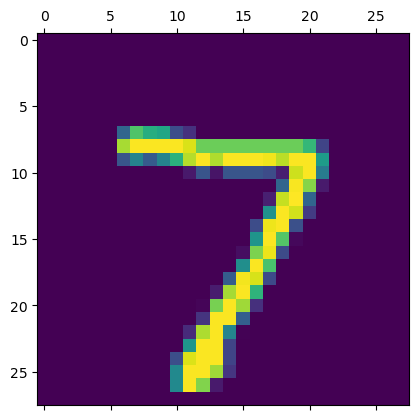

In [40]:
plt.matshow(X_test[0])

In [41]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]


313/313 [==============================] - 0s 892us/step


array([1.99696980e-02, 1.80659029e-07, 3.64149436e-02, 9.57736552e-01,
       2.13854085e-03, 1.06828906e-01, 1.21235826e-06, 9.99772370e-01,
       8.63930061e-02, 5.89939475e-01], dtype=float32)

In [42]:
np.argmax(y_predicted[0])

7

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 962    0    1    2    0    5    6    2    2    0]
 [   0 1113    3    2    0    1    4    2   10    0]
 [   6    9  916   20    7    6   12   10   43    3]
 [   2    0   16  927    1   25    2    9   22    6]
 [   1    1    4    1  925    0   10    4   11   25]
 [   8    3    3   32   10  784   11    4   32    5]
 [  11    3    6    1    7   17  908    2    3    0]
 [   1    5   20    9    8    1    0  952    6   26]
 [   5    7    6   19    9   27    8   11  877    5]
 [  10    7    1   12   35    9    0   24    9  902]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

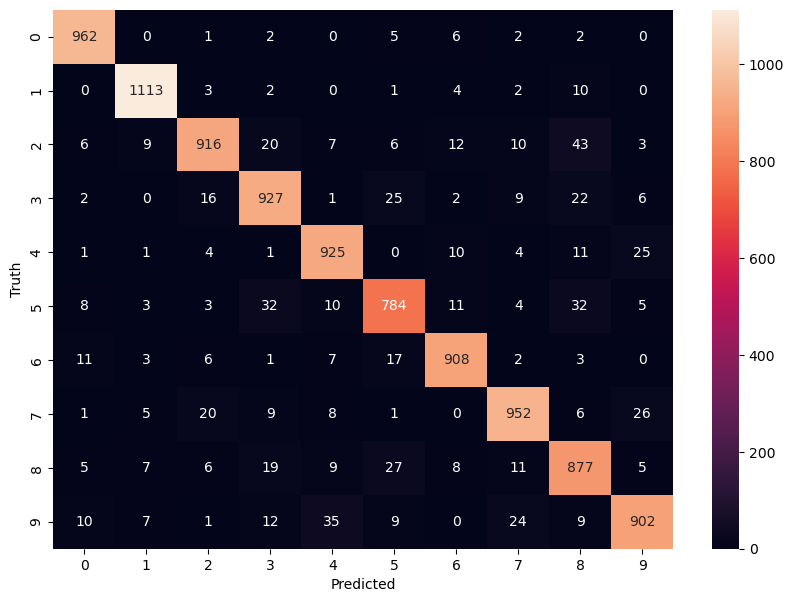

In [45]:
# Make result above more visualized

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1241 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0514 - accuracy: 0.9845


In [47]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0854 - accuracy: 0.9757


[0.08543330430984497, 0.9757000207901001]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

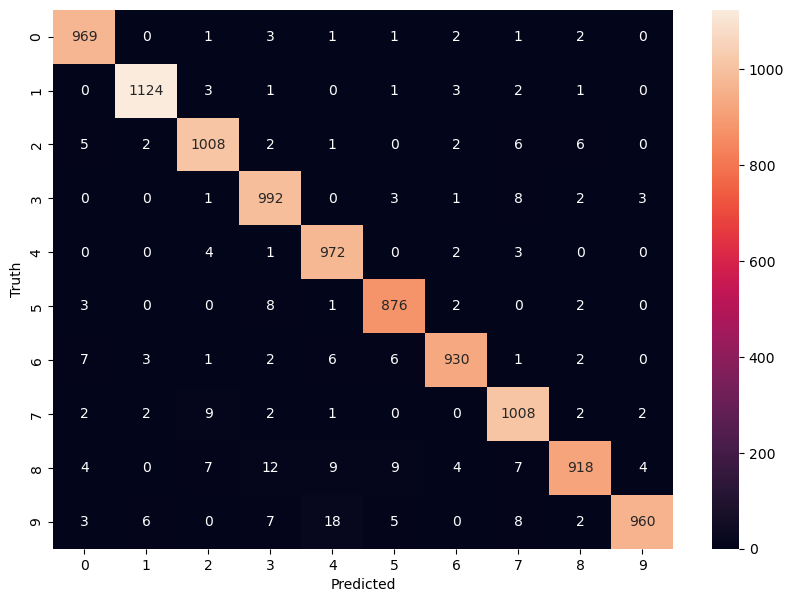

In [49]:
y_predicted = model2.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1193 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0810 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0626 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9855
